<a href="https://colab.research.google.com/github/drewamorbordelon/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/LS_DS19_Regression2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', 
                 parse_dates=['created'], 
                 index_col='created')
assert df.shape == (49352, 33)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
print(df.shape)
df.head()

(48817, 33)


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48817 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   description           47392 non-null  object 
 3   display_address       48684 non-null  object 
 4   latitude              48817 non-null  float64
 5   longitude             48817 non-null  float64
 6   price                 48817 non-null  int64  
 7   street_address        48807 non-null  object 
 8   interest_level        48817 non-null  object 
 9   elevator              48817 non-null  int64  
 10  cats_allowed          48817 non-null  int64  
 11  hardwood_floors       48817 non-null  int64  
 12  dogs_allowed          48817 non-null  int64  
 13  doorman               48817 non-null  int64  
 14  dishwasher            48817 non-nul

In [ ]:
import matplotlib.pyplot as plt

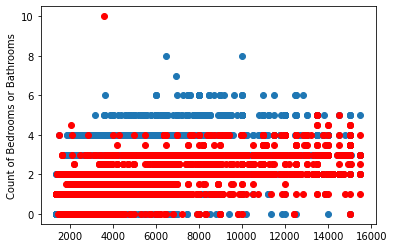

In [ ]:
plt.scatter(df['price'], df['bedrooms'])
plt.scatter(df['price'], df['bathrooms'], color='red')
# plt.xlabel('Price of Apartments')
plt.ylabel('Count of Bedrooms or Bathrooms')
# plt.legend()
plt.show()

## Split data to train and test

In [ ]:
# Split off the *target vector* from the *features matrix*
y = df['price']
X = df[['bathrooms', 
        'bedrooms']]

print(y.shape)
print(X.shape)

(48817,)
(48817, 2)


In [ ]:
X.head()

,bathrooms,bedrooms
created,,
2016-06-24 07:54:24,1.5,3
2016-06-12 12:19:27,1.0,2
2016-04-17 03:26:41,1.0,1
2016-04-18 02:22:02,1.0,1
2016-04-28 01:32:41,1.0,4


In [ ]:
y.head()

created
2016-06-24 07:54:24    3000
2016-06-12 12:19:27    5465
2016-04-17 03:26:41    2850
2016-04-18 02:22:02    3275
2016-04-28 01:32:41    3350
Name: price, dtype: int64

In [ ]:
# split dataset into TRAINING and VALIDATION sets
df.index = pd.to_datetime(df.index, infer_datetime_format=True)

# Split with April and May training and June for validating the model
cutoff = '2016-06-01 00:00:00'
mask = X.index < '2016-06-01 00:00:00'
X_train, y_train = X.loc[mask], y.loc[mask] # mask is calling the traing set 
X_val, y_val = X.loc[~mask], y.loc[~mask] # ~mask is calling the validation set

#type(mask)

In [ ]:
X_val

,bathrooms,bedrooms
created,,
2016-06-24 07:54:24,1.5,3
2016-06-12 12:19:27,1.0,2
2016-06-03 03:21:22,1.0,1
2016-06-01 03:11:01,1.0,1
2016-06-07 04:39:56,2.0,4
...,...,...
2016-06-16 04:20:46,1.0,2
2016-06-21 06:25:35,1.0,3
2016-06-02 13:24:18,1.0,1


In [ ]:
X_train, y_train

(                     bathrooms  bedrooms
 created                                 
 2016-04-17 03:26:41        1.0         1
 2016-04-18 02:22:02        1.0         1
 2016-04-28 01:32:41        1.0         4
 2016-04-19 04:24:47        2.0         4
 2016-04-27 03:19:56        1.0         2
 ...                        ...       ...
 2016-04-22 15:44:11        1.0         1
 2016-04-04 18:22:34        1.0         1
 2016-04-16 02:13:40        1.0         1
 2016-04-08 02:13:33        1.0         0
 2016-04-12 02:48:07        1.0         2
 
 [31844 rows x 2 columns], created
 2016-04-17 03:26:41    2850
 2016-04-18 02:22:02    3275
 2016-04-28 01:32:41    3350
 2016-04-19 04:24:47    7995
 2016-04-27 03:19:56    3600
                        ... 
 2016-04-22 15:44:11    4500
 2016-04-04 18:22:34    3950
 2016-04-16 02:13:40    2595
 2016-04-08 02:13:33    3350
 2016-04-12 02:48:07    2200
 Name: price, Length: 31844, dtype: int64)

In [ ]:
mask[5:]

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
mask[:-5]

array([False, False,  True, ...,  True,  True,  True])

##Establish a Baseline

In [ ]:
y_train

created
2016-04-17 03:26:41    2850
2016-04-18 02:22:02    3275
2016-04-28 01:32:41    3350
2016-04-19 04:24:47    7995
2016-04-27 03:19:56    3600
                       ... 
2016-04-22 15:44:11    4500
2016-04-04 18:22:34    3950
2016-04-16 02:13:40    2595
2016-04-08 02:13:33    3350
2016-04-12 02:48:07    2200
Name: price, Length: 31844, dtype: int64

In [ ]:
y_train.mean()

3575.604007034292

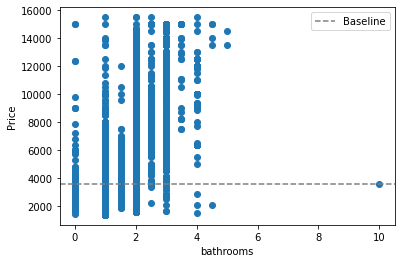

In [ ]:
col = 'bathrooms'
y_pred = [y_train.mean()]*len(X_train)
plt.scatter(X_train[col], y_train)  # only working with the training set
plt.axhline(y_train.mean(), color='grey', 
            linestyle='--', label='Baseline')
# plt.plot(X_train[col], y_pred, color='red', 
#          linestyle='--', label='Baseline Model')
plt.xlabel('bathrooms')
plt.ylabel('Price')

plt.legend();


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Baseline MAE: 1201.8811133682555


##Build our model

In [ ]:
from sklearn.linear_model import LinearRegression

# 1 Instantiate your model
model = LinearRegression()

# 2 Fit model to data
model.fit(X_train[[col]], y_train)

# 3 Make Predictions
y_pred = model.predict(X_train[[col]])

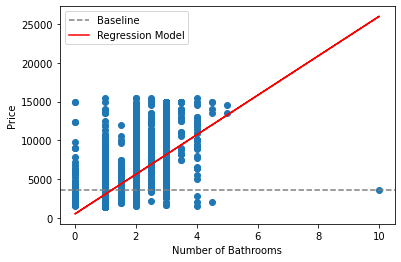

In [ ]:
col = 'bathrooms'

plt.scatter(X_train[col], y_train)  # only working with the training set

plt.axhline(y_train.mean(), color='grey', 
            linestyle='--', label='Baseline')
plt.plot(X_train[col],
         y_pred,
         color='red', 
         label='Regression Model',
         linestyle='-')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

plt.legend()
plt.show()

In [ ]:
model.intercept_, model.coef_

(504.055404559454, array([2551.69752546]))

#Check Metrics

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train[[col]])))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val[[col]])))

Training MAE: 887.3957058257155
Validation MAE: 890.4611966931298


In [ ]:
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(X_train[[col]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Training R2:', model.score(X_train[[col]], y_train))
print('Validation R2:', model.score(X_val[[col]], y_val))

Training R2: 0.46804349498047526
Validation R2: 0.48030991474044105


In [ ]:
# Multiple Linear Regression
from sklearn.metrics import r2_score
model = LinearRegression()

model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Training R2:', model2.score(X_train, y_train))
print('Validation R2:', model2.score(X_val, y_val))

Training R2: 0.5111543084316607
Validation R2: 0.5213303957090345


## Making new features


In [ ]:
# room_tot = bathrooms + bedrooms
df['rooms'] = df['bathrooms'] + df['bedrooms']

In [ ]:
df['rooms'].head()

created
2016-06-24 07:54:24    4.5
2016-06-12 12:19:27    3.0
2016-04-17 03:26:41    2.0
2016-04-18 02:22:02    2.0
2016-04-28 01:32:41    5.0
Name: rooms, dtype: float64

In [ ]:
df['bathrooms'].head()

created
2016-06-24 07:54:24    1.5
2016-06-12 12:19:27    1.0
2016-04-17 03:26:41    1.0
2016-04-18 02:22:02    1.0
2016-04-28 01:32:41    1.0
Name: bathrooms, dtype: float64

In [ ]:
df['bedrooms'].head()

created
2016-06-24 07:54:24    3
2016-06-12 12:19:27    2
2016-04-17 03:26:41    1
2016-04-18 02:22:02    1
2016-04-28 01:32:41    4
Name: bedrooms, dtype: int64

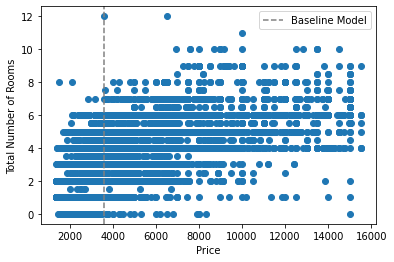

In [ ]:
plt.scatter(df['price'], df['rooms'])
plt.axvline(df['price'].mean(), color='grey', linestyle='--', label='Baseline Model')
plt.xlabel('Price')
plt.ylabel('Total Number of Rooms')
plt.legend()
plt.show()




In [ ]:
# Multiple Linear Regression
from sklearn.metrics import r2_score
model2 = LinearRegression()

model2.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Training R2:', model2.score(X_train, y_train))
print('Validation R2:', model2.score(X_val, y_val))

Training R2: 0.5111543084316607
Validation R2: 0.5213303957090345


In [ ]:
df = df.dropna(subset=['bathrooms', 'bedrooms'])
df.isnull().sum()

bathrooms                  0
bedrooms                   0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
rooms                      0
dtype: int64

In [ ]:
df['bedtobath'] = df['bedrooms'] / df['bathrooms']

In [ ]:
df = df.dropna(subset=['bedtobath'])

In [ ]:
df['bedtobath'].isnull().sum()

0

In [ ]:
y = df['price']
X = df[['rooms', 
        'bedtobath']]

In [ ]:
X_train,y_train

(                     bathrooms  bedrooms
 created                                 
 2016-04-17 03:26:41        1.0         1
 2016-04-18 02:22:02        1.0         1
 2016-04-28 01:32:41        1.0         4
 2016-04-19 04:24:47        2.0         4
 2016-04-27 03:19:56        1.0         2
 ...                        ...       ...
 2016-04-22 15:44:11        1.0         1
 2016-04-04 18:22:34        1.0         1
 2016-04-16 02:13:40        1.0         1
 2016-04-08 02:13:33        1.0         0
 2016-04-12 02:48:07        1.0         2
 
 [31844 rows x 2 columns], created
 2016-04-17 03:26:41    2850
 2016-04-18 02:22:02    3275
 2016-04-28 01:32:41    3350
 2016-04-19 04:24:47    7995
 2016-04-27 03:19:56    3600
                        ... 
 2016-04-22 15:44:11    4500
 2016-04-04 18:22:34    3950
 2016-04-16 02:13:40    2595
 2016-04-08 02:13:33    3350
 2016-04-12 02:48:07    2200
 Name: price, Length: 31844, dtype: int64)